## Observations and Insights 

# Observations
1. Top 3 regimen: Ramicane, Capomulin and Infubinol. The performance of Ramicane and Capomulin are more stable.
2. Tumor size decreases while treatment continues
3. Tumor size and weight has a strong positive correlation (r = 0.84)

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.
mouse_count = mouse_study.groupby("Mouse ID").count()
mouse_count

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_duplicate = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False), :]
mouse_duplicate = mouse_study.loc[mouse_study["Mouse ID"] == duplicate_id[0], :]
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_study.drop(index=mouse_duplicate.index)
mouse_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = mouse_clean.groupby("Mouse ID").count()
mouse_clean_count

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs = mouse_clean["Drug Regimen"].unique().tolist()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# by dict of list
mouse_summary_dict = {}
for d in drugs:
    sum_list = []
    sum_list.append(mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].mean())
    sum_list.append(mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].median())
    sum_list.append(mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].var())
    sum_list.append(mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].std())
    sum_list.append(mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].sem())
    sum_list.append(mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].max())
    sum_list.append(mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].min())
    mouse_summary_dict[d] = sum_list
mouse_summary = pd.DataFrame(mouse_summary_dict)
mouse_summary = mouse_summary.transpose()
mouse_summary.columns = ["mean", "median", "var", "std", "sem","max","min"]
mouse_summary = mouse_summary.sort_index()
mouse_summary.index.name = "Drug Regimen"
mouse_summary

,mean,median,var,std,sem,max,min
Drug Regimen,,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,48.158209,23.343598
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,68.923185,45.000000
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,72.226731,36.321346
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,78.567014,45.000000
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,76.668817,45.000000
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,73.212939,45.000000
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,72.455421,45.000000
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,47.622816,22.050126
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,75.123690,45.000000


In [30]:
# By list of dict

mouse_summary_list = []
for d in drugs:
    sum_dict = {"Drug Regimen" : d}
    sum_dict["mean"] = mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].mean()
    sum_dict["median"] = mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].median()
    sum_dict["variance"] = mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].var()
    sum_dict["std"] = mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].std()
    sum_dict["sem"] = mouse_clean.loc[mouse_clean["Drug Regimen"] == d]["Tumor Volume (mm3)"].sem()
    mouse_summary_list.append(sum_dict)
mouse_summary_2 = pd.DataFrame(mouse_summary_list)
mouse_summary_2 = mouse_summary_2.set_index("Drug Regimen")
mouse_summary_2 = mouse_summary_2.sort_index()
mouse_summary_2

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mouse_summary_group = mouse_clean.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem" ]
})
mouse_summary_group

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Regimen Research Mice Test')

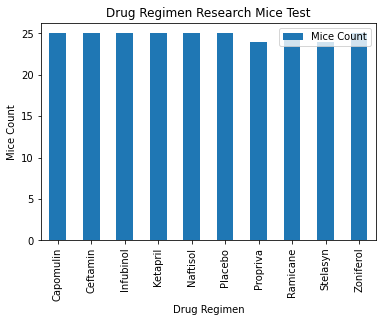

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_df = mouse_clean.groupby(["Drug Regimen","Mouse ID"]).count()
treatment_df = treatment_df.reset_index(level=1)
treatment_df = pd.DataFrame(treatment_df.groupby(level=0)["Mouse ID"].count())
treatment_df = treatment_df.rename(columns={"Mouse ID" : "Mice Count"})
pd_plot = treatment_df.plot.bar()
pd_plot.set_ylabel("Mice Count")
pd_plot.set_title("Drug Regimen Research Mice Test")

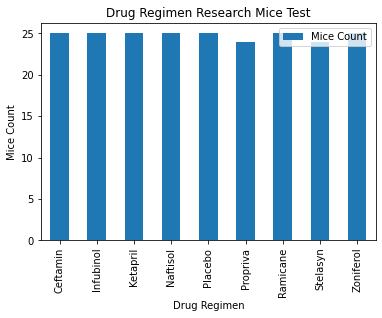

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
py_plot = plt.bar(treatment_df.index, treatment_df["Mice Count"], width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.xticks(np.arange(0, len(treatment_df.index)), treatment_df.index, rotation=90)
plt.title("Drug Regimen Research Mice Test")
plt.legend(["Mice Count"])
plt.xlim(left=0.5, right = len(treatment_df.index) - 0.5)
plt.show()

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_clean.head()
mouse_sex = mouse_clean.groupby(["Mouse ID", "Sex"]).count().reset_index()
mouse_sex = mouse_sex[["Mouse ID", "Sex"]].groupby("Sex").count()
mouse_sex.columns = ["Mice Count"]
mouse_sex_total = mouse_sex["Mice Count"].sum()
mouse_sex


,Mice Count
Sex,
Female,123
Male,125


Text(0.5, 1.0, 'Research Mice Sex Compare')

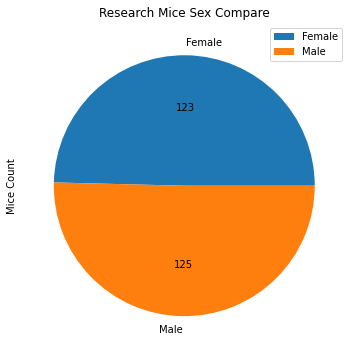

In [35]:
def getmicecountvalue(val):
    return round(val * mouse_sex_total / 100,0).astype("int32")
pd_pie = mouse_sex.plot.pie(y="Mice Count" , figsize=(6,6), autopct=getmicecountvalue)
pd_pie.set_title("Research Mice Sex Compare")

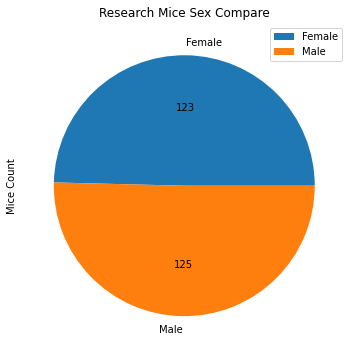

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6,6))
pie_plot = plt.pie(mouse_sex["Mice Count"], labels=mouse_sex.index, autopct=getmicecountvalue)
plt.ylabel("Mice Count")
plt.title("Research Mice Sex Compare")
plt.legend(mouse_sex.index)
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# for checking outliers
max_size = mouse_clean["Tumor Volume (mm3)"].max()
min_size = mouse_clean["Tumor Volume (mm3)"].min()
print(max_size)
print(min_size)
mouse_clean.head()

78.56701362
22.05012627


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_clean = mouse_clean.loc[mouse_clean["Drug Regimen"].isin(drug_list)]
drug_clean_last_time = pd.DataFrame(drug_clean.groupby("Mouse ID")["Timepoint"].max()).reset_index()
drug_clean_last_df = pd.merge(drug_clean, drug_clean_last_time, on=["Mouse ID", "Timepoint"], how="right")
drug_clean_last_df = drug_clean_last_df.sort_values("Drug Regimen")
tumor_list = []
tumor_size_list = []
for drug in drug_list:
    tumor_size_list.append(drug_clean_last_df.loc[drug_clean_last_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"])
    qtr = drug_clean_last_df.loc[drug_clean_last_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    irq = qtr[0.75] - qtr[0.25]
    lower = qtr[0.25] - 1.5 * irq
    upper = qtr[0.75] + 1.5 * irq
    outliers = drug_clean_last_df.loc[((drug_clean_last_df["Tumor Volume (mm3)"] < lower) | (drug_clean_last_df["Tumor Volume (mm3)"] > upper)) & (drug_clean_last_df["Drug Regimen"] == drug)]
    tumor_list.append({
        "Name" : drug,
        "IRQ" : irq,
        "Lower" : lower,
        "Upper" : upper,
        "Outliers" : outliers,
        "Median" : qtr[0.5],
        "1/4" : qtr[0.25],
        "3/4" : qtr[0.75]
    })

([<matplotlib.axis.XTick at 0x284bc6c2e50>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

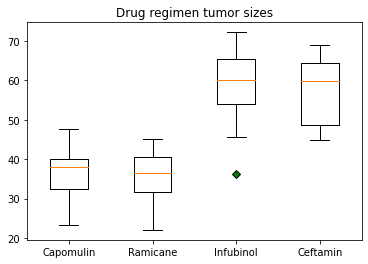

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Drug regimen tumor sizes')
ax.boxplot(tumor_size_list, flierprops=green_diamond)
plt.xticks(ticks=np.arange(1,5), labels=drug_list)

## Line and Scatter Plots

Text(0.5, 1.0, 'Timepoint vs Tumor Volume for mouse id s185')

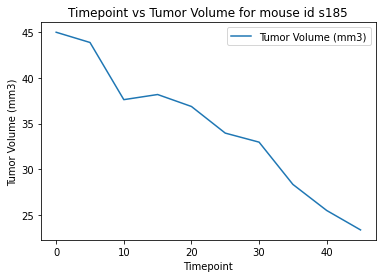

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomuli
mouse_id = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()[0]
mouse_select = mouse_clean.loc[mouse_clean["Mouse ID"] == mouse_id] 
mouse_tp = mouse_select.copy().set_index("Timepoint")
mouse_tp = mouse_tp[["Tumor Volume (mm3)"]]
ax = mouse_tp.plot.line()
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Timepoint vs Tumor Volume for mouse id " + mouse_id)

Text(0.5, 1.0, 'Weight (g) vs avg. Tumor Volume (mm3) for Capomulin Regimen')

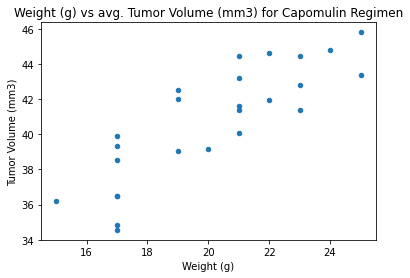

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_wt = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
mouse_wt = mouse_wt[["Weight (g)", "Tumor Volume (mm3)"]]

fig, ax = plt.subplots(1, 1)
mouse_wt.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", ax=ax)
ax.set_title("Weight (g) vs avg. Tumor Volume (mm3) for Capomulin Regimen")

## Correlation and Regression

(0.8419363424694717, 1.322572243471279e-07)
                    Weight (g)  Tumor Volume (mm3)
Weight (g)            1.000000            0.841936
Tumor Volume (mm3)    0.841936            1.000000
y = 0.95x + 21.55
r value: 0.8419363424694718


Text(0.5, 1.0, 'Weight (g) vs avg. Tumor Volume (mm3) for Capomulin Regimen')

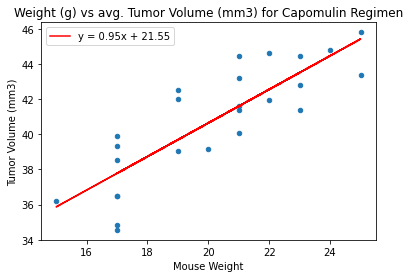

In [42]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
corr_by_st = st.pearsonr(mouse_wt["Weight (g)"],mouse_wt["Tumor Volume (mm3)"])
print(corr_by_st)

corr_by_panda = mouse_wt.corr(method="pearson")
print(corr_by_panda)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_wt["Weight (g)"], mouse_wt["Tumor Volume (mm3)"])
regress_values = mouse_wt["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"r value: {rvalue}")
new_df = pd.DataFrame({"Mouse Weight" : mouse_wt["Weight (g)"],
                      "Tumor Volume" : regress_values})

fig, ax = plt.subplots(1, 1)
mouse_wt.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", ax=ax)
new_df.plot.line(x="Mouse Weight", y="Tumor Volume", color="r", ax=ax, label=line_eq)
ax.set_title("Weight (g) vs avg. Tumor Volume (mm3) for Capomulin Regimen")
#plt.plot(mouse_wt["Weight (g)"], regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")